In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
import time

from IPython.display import display


##### Демонстрация бинарной классификации и трехмермерной регрессии работы GB
#
#    http://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html
#    http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html
#
###########################################

In [77]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.958


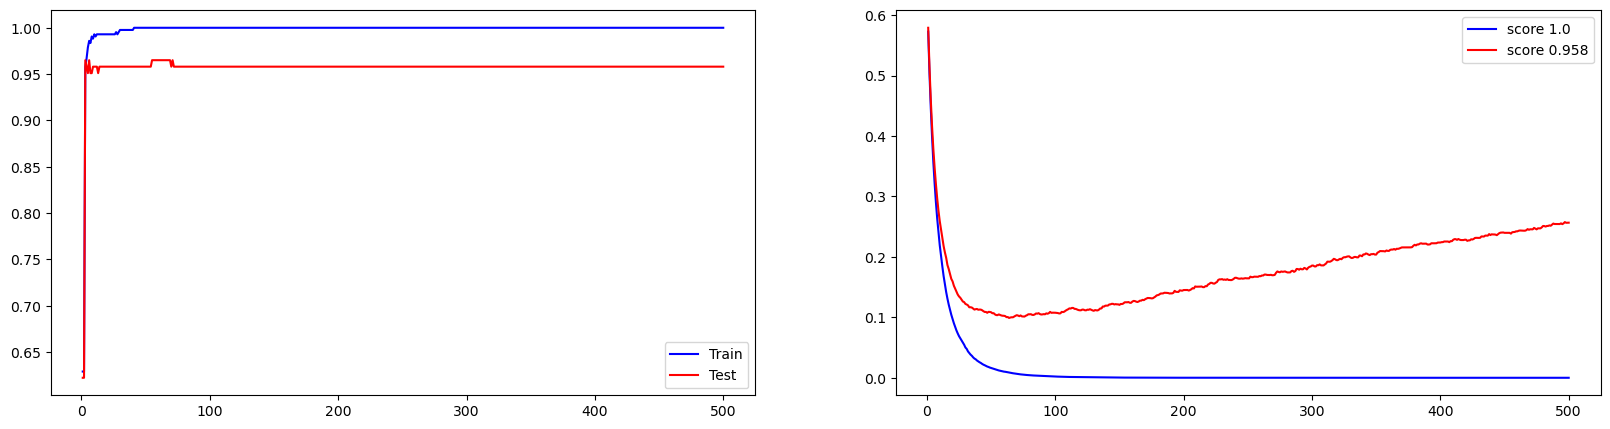

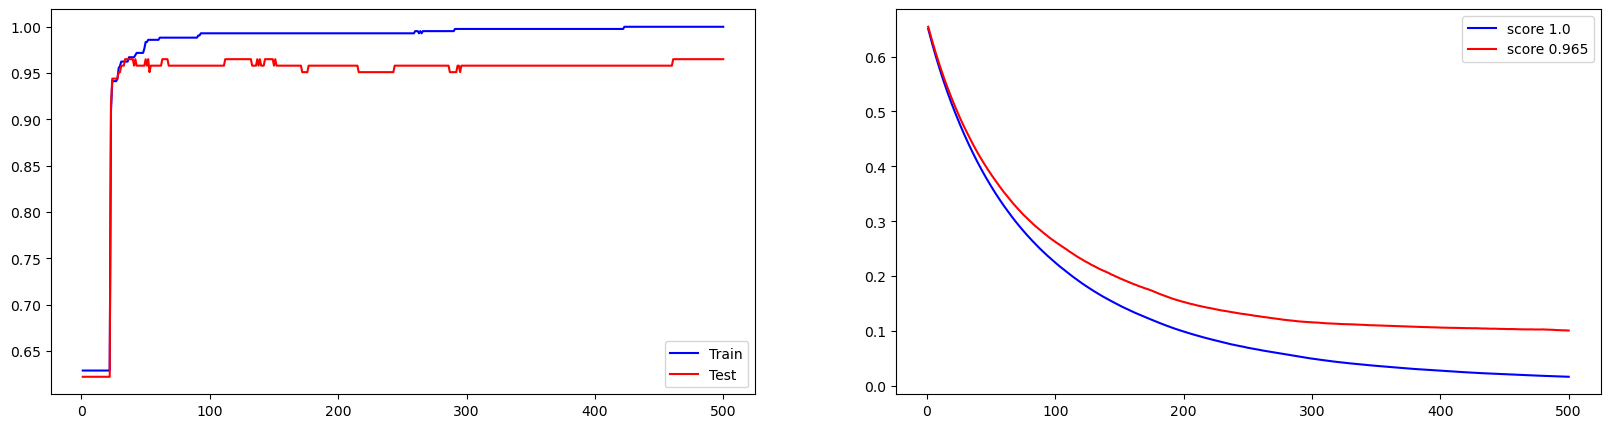

In [78]:
def plot_learnig_tree_new(estimator, X_train, X_test, y_train, y_test):  
    
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    n_estimators = estimator.n_estimators_
    zero = np.zeros(n_estimators, dtype=np.float64)
    color_one = 'blue'
    color_two = 'red'
    
    train_score = zero
    for i, y_pred_train in enumerate(estimator.staged_predict(X_train)):
        train_score[i] = accuracy_score(y_train, y_pred_train)
    ax1.plot(
        (np.arange(train_score.shape[0]) + 1),
        train_score,
        "-",
        color=color_one,
        label='Train',
        )
        
    test_score = zero
    for i, y_pred_test in enumerate(estimator.staged_predict(X_test)):
        test_score[i] = accuracy_score(y_test, y_pred_test)    
    ax1.plot(
        (np.arange(test_score.shape[0]) + 1),
        test_score,
        "-",
        color = color_two,
        label='Test',
        )
    ax1.legend(loc='best')


    train_deviance = zero
    for i, y_pred_train in enumerate(estimator.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred_train)
        
    ax2.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        '-',
        color=color_one,
        label="score "+str(round(estimator.score(X_train, y_train),3))
    )

    test_deviance = zero
    for i, y_pred_test in enumerate(estimator.staged_predict_proba(X_test)):
        test_deviance[i] = log_loss(y_test, y_pred_test)
        
    ax2.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        '-',
        color=color_two,
        label="score "+str(round(estimator.score(X_test, y_test),3))
    )
    ax2.legend(loc='best')    
    
    
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

clf = GradientBoostingClassifier(n_estimators=500,random_state=42)
clf.fit(X_train, y_train)
#plot_learnig_tree(clf, X_train, X_test, y_train, y_test)
plot_learnig_tree_new(clf, X_train, X_test, y_train, y_test)



clf = GradientBoostingClassifier(n_estimators=500,random_state=42, learning_rate = 0.01)
clf.fit(X_train, y_train)
#plot_learnig_tree(clf, X_train, X_test, y_train, y_test)
plot_learnig_tree_new(clf, X_train, X_test, y_train, y_test)



In [79]:
clf1 = GradientBoostingClassifier(n_estimators=80,random_state=42)
clf1.fit(X_train, y_train)
clf2 = GradientBoostingClassifier(n_estimators=120,random_state=42, learning_rate = 0.05)
clf2.fit(X_train, y_train)
clf3 = GradientBoostingClassifier(n_estimators=500,random_state=42, learning_rate = 0.01)
clf3.fit(X_train, y_train)
print(clf1.score(X_test, y_test))
print(clf2.score(X_test, y_test))
print(clf3.score(X_test, y_test))

0.958041958041958
0.965034965034965
0.965034965034965


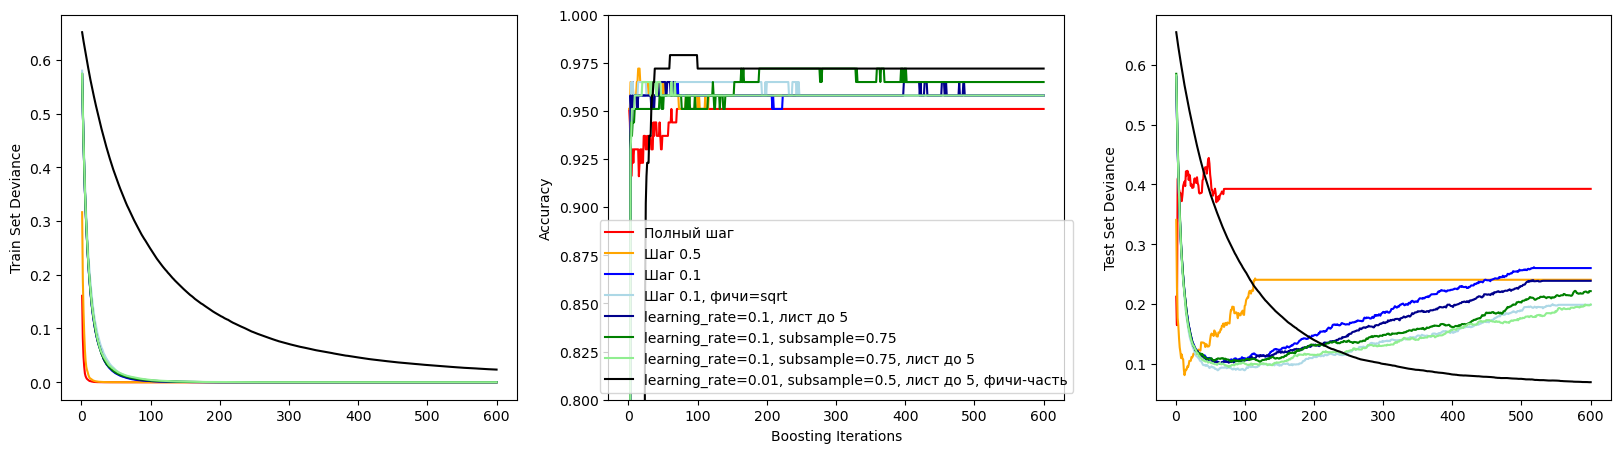

In [80]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
labels, y = np.unique(cancer.target, return_inverse=True)


original_params = {
    "n_estimators": 600,
    #"max_leaf_nodes": None,
    #"max_depth": None,
    #"random_state": 42,
    'criterion': 'friedman_mse'
    
}

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for label, color, setting in [
    ("Полный шаг", "red", {"learning_rate": 1.0, "subsample": 1.0}),
    ("Шаг 0.5", "orange", {"learning_rate": 0.5, "subsample": 1.0}),
    ("Шаг 0.1", "blue",   {"learning_rate": 0.1, "subsample": 1.0}),
    ("Шаг 0.1, фичи=sqrt",
              "lightblue", {"learning_rate": 0.1, "subsample": 1.0, "max_features": 'sqrt'},
    ),
    ("learning_rate=0.1, лист до 5",
               "darkblue", {"learning_rate": 0.1, "subsample": 1.0, "min_samples_split" : 5},
    ),
    ("learning_rate=0.1, subsample=0.75",
                  "green", {"learning_rate": 0.1, "subsample": 0.75},
    ),
    ("learning_rate=0.1, subsample=0.75, лист до 5",
             "lightgreen", {"learning_rate": 0.1, "subsample": 0.75, "min_samples_split" : 5},
    ),
    ("learning_rate=0.01, subsample=0.5, лист до 5, фичи-часть",
             "black", {"learning_rate": 0.01, "subsample": 0.5, "min_samples_split" : 5, "max_features": 'sqrt'},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    train_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred)
        
    ax1.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        "-",
        color=color,
        label=label,
    )

    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_score[i] = accuracy_score(y_test, y_pred)
        
    ax2.plot(
        (np.arange(test_score.shape[0]) + 1),
        test_score,
        "-",
        color=color,
        label=label,
    )
    
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_test)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = log_loss(y_test, y_pred)
        

    ax3.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        "-",
        color=color,
        label=label,
    )

ax2.legend(loc='lower center')
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylim(0.8, 1.)
ax1.set_ylabel("Train Set Deviance")
ax2.set_ylabel("Accuracy")
ax3.set_ylabel("Test Set Deviance")

plt.show()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state= 10)

gbrt = GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, min_samples_split=5, n_estimators=600,random_state=12)
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.972


In [82]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state= 10)

gbrt = GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split=5, n_estimators=600,random_state=12)
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))


Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.979


In [83]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state= 10)

gbrt = GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, min_samples_split=5, n_estimators=50,random_state=12)
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.998
Правильность на тестовом наборе: 0.972


In [84]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state= 10)

gbrt = GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split=5, n_estimators=50,random_state=12)
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.967
Правильность на тестовом наборе: 0.944


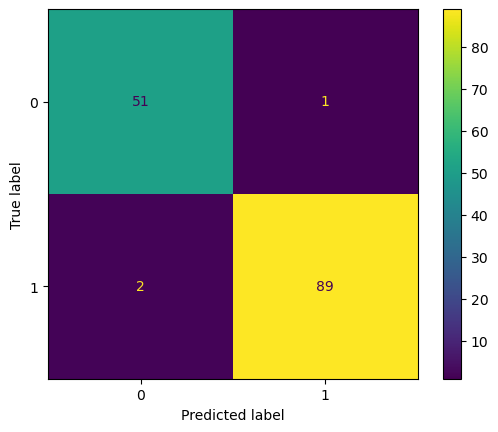

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state= 10)

gbrt = GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split=5, n_estimators=600,random_state=12)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot();

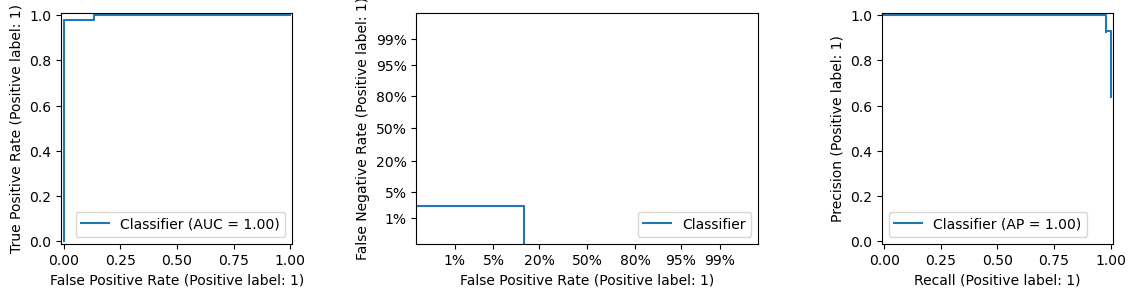

In [86]:
from sklearn.metrics import classification_report, RocCurveDisplay, DetCurveDisplay,PrecisionRecallDisplay

y_pred_proba = gbrt.decision_function(X_test)

f, axes = plt.subplots(1, 3, figsize=(15, 3))
RocCurveDisplay.from_predictions(y_test, y_pred_proba, ax =axes[0]);
DetCurveDisplay.from_predictions(y_test, y_pred_proba, ax =axes[1]);
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba, ax =axes[2]);

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.99      0.98      0.98        91

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



## Ранний останов

Ранняя остановка - это метод используемый в градиентном бустенге, позволяющий нам найти оптимальное количество итераций, необходимых для создания модели, которая хорошо обобщает данные и избегает переподгонки. 

Концепция проста - мы выделяем часть нашего набора данных в качестве валидационного набора проверки (`validation_fraction`) для оценки качества модели во время обучения. 

Поскольку модель строится итеративно, ее качество на валидации зависимости от количества шагов.

Ранняя остановка происходит, когда оценка качества модели на валидации остается неизменным или ухудшается (в пределах отклонения `tol`) в течение определенного количества итераций (`n_iter_no_change`). Это сигнализирует о том, что модель достигла точки, когда дальнейшие итерации могут привести к чрезмерной подгонке, и пришло время прекратить обучение.

Количество эстиматоров в конечной модели, когда сработала ранняя остановка, можно получить доступ с помощью атрибута `n_estimators_`.

In [88]:
params= dict(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=42)

gbm_full = GradientBoostingClassifier(**params)
gbm_early_stopping = GradientBoostingClassifier(
    **params,
    validation_fraction=0.1,
    n_iter_no_change=10,
)

start_time = time.time()
gbm_full.fit(X_train, y_train)
training_time_full = time.time() - start_time
n_estimators_full = gbm_full.n_estimators_
print('время :', training_time_full)
print('итераций :', n_estimators_full)

start_time = time.time()
gbm_early_stopping.fit(X_train, y_train)
training_time_early_stopping = time.time() - start_time
estimators_early_stopping = gbm_early_stopping.n_estimators_
print('время :', training_time_early_stopping)
print('итераций :', estimators_early_stopping)

время : 0.7817480564117432
итераций : 1000
время : 0.1073296070098877
итераций : 36


In [89]:
train_errors_without = []
test_errors_without = []

train_errors_with = []
test_errors_with = []

for i, (train_pred, test_pred) in enumerate(
    zip(
        gbm_full.staged_predict_proba(X_train),
        gbm_full.staged_predict_proba(X_test),
    )
):
    train_errors_without.append(log_loss(y_train, train_pred))
    test_errors_without.append(log_loss(y_test, test_pred))

for i, (train_pred, test_pred) in enumerate(
    zip(
        gbm_early_stopping.staged_predict_proba(X_train),
        gbm_early_stopping.staged_predict_proba(X_test),
    )
):
    train_errors_with.append(log_loss(y_train, train_pred))
    test_errors_with.append(log_loss(y_test, test_pred))

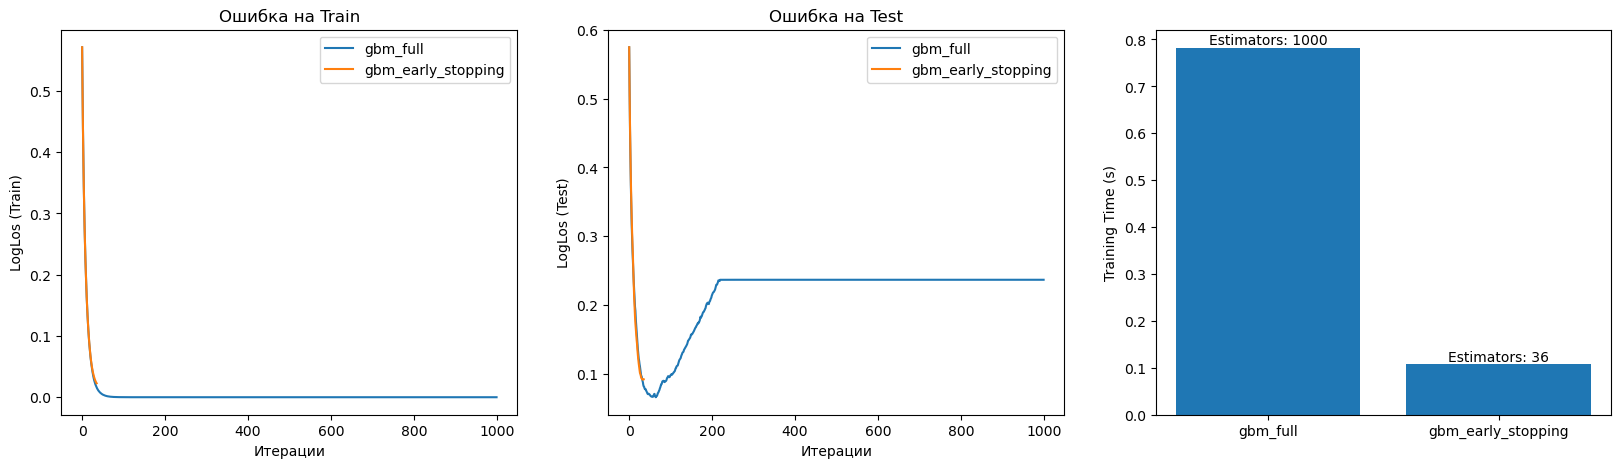

In [90]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

axes[0].plot(train_errors_without, label="gbm_full")
axes[0].plot(train_errors_with, label="gbm_early_stopping")
axes[0].set_xlabel("Итерации")
axes[0].set_ylabel("LogLos (Train)")
#axes[0].set_yscale("log")
axes[0].legend()
axes[0].set_title("Ошибка на Train");

axes[1].plot(test_errors_without, label="gbm_full")
axes[1].plot(test_errors_with, label="gbm_early_stopping")
axes[1].set_xlabel("Итерации")
axes[1].set_ylabel("LogLos (Test)")
#axes[1].set_yscale("log")
axes[1].legend()
axes[1].set_title("Ошибка на Test");

training_times = [training_time_full, training_time_early_stopping]
labels = ["gbm_full", "gbm_early_stopping"]
bars = axes[2].bar(labels, training_times)
axes[2].set_ylabel("Training Time (s)")

for bar, n_estimators in zip(bars, [n_estimators_full, estimators_early_stopping]):
    height = bar.get_height()
    axes[2].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.001,
        f"Estimators: {n_estimators}",
        ha="center",
        va="bottom",
    )

In [91]:
global_min = np.argmin(test_errors_without)

In [92]:
np.argmin(test_errors_with)

33

In [93]:
pd.Series(test_errors_with)

0     0.574800
1     0.508671
2     0.460010
3     0.419307
4     0.383522
5     0.353363
6     0.328186
7     0.306470
8     0.288037
9     0.271295
10    0.248911
11    0.229466
12    0.211306
13    0.197959
14    0.183877
15    0.173269
16    0.165370
17    0.156891
18    0.149217
19    0.142968
20    0.134192
21    0.126800
22    0.120763
23    0.115023
24    0.110368
25    0.105600
26    0.101261
27    0.099669
28    0.097204
29    0.094455
30    0.093464
31    0.092199
32    0.092335
33    0.091688
34    0.091883
35    0.092060
dtype: float64

In [94]:
gbm_early_stopping.n_estimators_

36

In [95]:
params_global_min = dict(n_estimators=64, max_depth=5, learning_rate=0.1, random_state=42)
params_local_min  = dict(n_estimators=33, max_depth=5, learning_rate=0.1, random_state=42)
params_early_stop  = dict(n_estimators=36, max_depth=5, learning_rate=0.1, random_state=42)

In [96]:
gbt = GradientBoostingClassifier(**params_global_min)
gbt.fit(X_train, y_train)
gbt.score(X_test, y_test)

0.9790209790209791

In [97]:
gbt = GradientBoostingClassifier(**params_local_min)
gbt.fit(X_train, y_train)
gbt.score(X_test, y_test)

0.972027972027972

In [98]:
gbt = GradientBoostingClassifier(**params_early_stop)
gbt.fit(X_train, y_train)
gbt.score(X_test, y_test)

0.9790209790209791

In [112]:
hist_gbm_early_stopping = HistGradientBoostingClassifier(
    max_iter=100, # до 10 000 строк раннего останова нет
    max_depth=5, learning_rate=0.1, random_state=42,
    #early_stopping=True,
    #validation_fraction=0.1,
    #n_iter_no_change=10,
)

hist_gbm_early_stopping.fit(X_train, y_train)
hist_gbm_early_stopping.score(X_test, y_test)

0.972027972027972

In [113]:
hist_gbm_early_stopping.n_iter_

100

In [114]:
hist_gbm_early_stopping = HistGradientBoostingClassifier(
    max_iter=100,
    max_depth=5, learning_rate=0.1, random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
)

hist_gbm_early_stopping.fit(X_train, y_train)
hist_gbm_early_stopping.score(X_test, y_test)

0.9790209790209791

In [115]:
hist_gbm_early_stopping.n_iter_

71